<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/tapi-logo-small.png" />

This notebook free for educational reuse under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).

Created by [Xanda Schofield](https://www.cs.hmc.edu/~xanda) for the 2022 Text Analysis Pedagogy Institute, with support from the [National Endowment for the Humanities](https://neh.gov), [JSTOR Labs](https://labs.jstor.org/), and [University of Arizona Libraries](https://new.library.arizona.edu/).

For questions/comments/improvements, email xanda@cs.hmc.edu.<br />
____

# Text Data Curation 2

This is lesson 2 of 3 in the educational series on Text Data Curation. This notebook is intended to introduce the basics of treating text documents as data and how to store and filter those documents.

**Audience:** `Learners` / `Researchers`

**Use case:** [`How-To`](https://constellate.org/docs/documentation-categories#howtoproblemoriented) 

**Difficulty:** `Intermediate`
Assumes users are familiar with Python and have been programming for 6+ months. Code makes up a larger part of the notebook and basic concepts related to Python are not explained.

**Completion time:** `90 minutes`

**Knowledge Required:** 
```
* Python basics (variables, flow control, functions, lists, dictionaries)
* How Python libraries work (installation and imports)
```

**Knowledge Recommended:**
```
* Basic file operations (open, close, read, write)
* How text is stored on computers
```

**Learning Objectives:**
After this lesson, learners will be able to:
```
1. Describe and implement an XXXX for XXXX
2. Convert XXXX into XXXX for the purpose of XXXX
3. Develop a workflow in order to XXXX
4. Be familiar with XXXXX resources for pursuing the topic
```
**Research Pipeline:**
```
1. Research steps before this notebook
2. **The skills in this notebook**
3. Steps after this notebook
4. Final steps
```
___

# Required Python Libraries
`List out any libraries used and what they are used for`
* [Tesseract](https://tesseract-ocr.github.io/) for performing [optical character recognition](https://docs.constellate.org/key-terms/#ocr).
* [Pandas](https://pandas.pydata.org/) for manipulating and cleaning data.
* [Pdf2image](https://pdf2image.readthedocs.io/en/latest/) for converting pdf files into image files.

## Install Required Libraries

In [35]:
### Install Libraries ###

# Get spacy and the English web data language model
!pip install spacy
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 93 kB/s s eta 0:00:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# %%bash
# apt-get install tesseract-ocr
# y

In [32]:
### Import Libraries ###
import re

from matplotlib import pyplot as plt
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import spacy

# Required Data

`List out the data sources, including their formats and a few sentences describing the data. Include a link to the data source description, if possible.`

**Data Format:** 
* image files (.jpg, .png)
* document files (.pdf)
* plain text (.txt)

**Data Source:**
* [Detroit Open Data Portal](https://data.detroitmi.gov/datasets/detroitmi::dpd-citizen-complaints/about)

**Data Quality/Bias:**
`Analysis of this data should consider the following quality and bias issues...`

**Data Description:**

`This lesson uses XXXX data in XXX format from XXXX source. Additional details about the data used.`

## Download Required Data

In [11]:
### Grab just the space messages to start
newsgroup_data = fetch_20newsgroups(categories=['sci.space'])

# Introduction

```
Introduce the lesson topic. Answer questions such as:
* Why is it useful? 
* Why should we learn it? 
* Who might use it? 
* Where has it been used by scholars/industry?
* What do we need to do it?
* What subjects are included in the notebooks?
* What is not in this notebook? Where should we look for it?
```

# Lesson

## Style tips for writing your lesson body

In [41]:
def data_by_idx(idx, full=False, n_chars=1000, data=newsgroup_data.data):
    if full:
        return data[idx]
    else:
        return data[idx][:n_chars] + ' ... [ {} more characters ]'.format(len(data[idx]) - n_chars)

In [42]:
for i in range(10):
    print(data_by_idx(i))

From: henry@zoo.toronto.edu (Henry Spencer)
Subject: Re: japanese moon landing?
Organization: U of Toronto Zoology
Lines: 21

In article <1qnb9tINN7ff@rave.larc.nasa.gov> C.O.EGALON@LARC.NASA.GOV (CLAUDIO OLIVEIRA EGALON) writes:
>> there is no such thing as a stable lunar orbit
>
>Is it right??? That is new stuff for me. So it means that  you just can 
>not put a sattellite around around the Moon for too long because its 
>orbit will be unstable??? If so, what is the reason??? Is that because 
>the combined gravitacional atraction of the Sun,Moon and Earth 
>that does not provide a stable  orbit around the Moon???

Any lunar satellite needs fuel to do regular orbit corrections, and when
its fuel runs out it will crash within months.  The orbits of the Apollo
motherships changed noticeably during lunar missions lasting only a few
days.  It is *possible* that there are stable orbits here and there --
the Moon's gravitational field is poorly mapped -- but we know of none.

Perturbations 

In [14]:
def remove_quotes_a(doc):
    # delete lines that start with > or |>
    lines = doc.split('\n')
    lines_to_keep = [l for l in lines if not (l.startswith('>') or l.startswith('|>'))]
    return '\n'.join(lines_to_keep)


def remove_quotes_b(doc):
    # replace a sequence of lines that starts with > or |> with one new line
    # I use pythex.org to troubleshoot these for Python
    return re.sub(r'\n(\|?>+[^\n]*\n)+', '\n', doc)

In [15]:
for i in range(10):
    print(remove_quotes_a(data_by_idx(i, full=True)))

From: henry@zoo.toronto.edu (Henry Spencer)
Subject: Re: japanese moon landing?
Organization: U of Toronto Zoology
Lines: 21

In article <1qnb9tINN7ff@rave.larc.nasa.gov> C.O.EGALON@LARC.NASA.GOV (CLAUDIO OLIVEIRA EGALON) writes:

Any lunar satellite needs fuel to do regular orbit corrections, and when
its fuel runs out it will crash within months.  The orbits of the Apollo
motherships changed noticeably during lunar missions lasting only a few
days.  It is *possible* that there are stable orbits here and there --
the Moon's gravitational field is poorly mapped -- but we know of none.

Perturbations from Sun and Earth are relatively minor issues at low
altitudes.  The big problem is that the Moon's own gravitational field
is quite lumpy due to the irregular distribution of mass within the Moon.
-- 
All work is one man's work.             | Henry Spencer @ U of Toronto Zoology
                    - Kipling           |  henry@zoo.toronto.edu  utzoo!henry

From: henry@zoo.toronto.edu (Hen

In [16]:
# Using a new name to avoid conflicts
clean_newsgroup_data = fetch_20newsgroups(categories=['sci.space'], remove=('headers', 'footers', 'quotes'))

Text(0.5, 0, 'Word count')

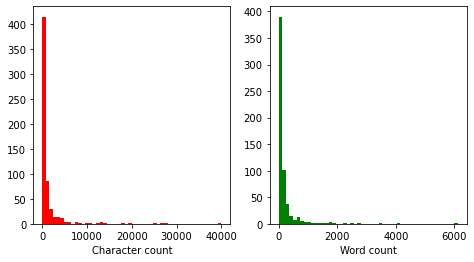

In [17]:
# Let's look at some histograms and see if there are any concerning outliers
char_counts = np.array([len(d) for d in clean_newsgroup_data.data])
word_counts = np.array([len(d.split()) for d in clean_newsgroup_data.data])
# can we keep track of how many lines are in each document as well?

# make a figure 3x as wide as it is tall
# this will allow us 3 subplots in one plot!
plt.figure(figsize=(12, 4))

# plot 1: character counts
plt.subplot(1, 3, 1) # this says this is the first of the plots in 1 row and 3 columns
plt.hist(x=char_counts, bins=50, color='red', label='Characters')
plt.xlabel("Character count")

# plot 2: word counts
plt.subplot(1, 3, 2) 
plt.hist(x=word_counts, bins=50, color='green', label='Words')
plt.xlabel("Word count")

# how would we make the third plot a blue plot of the number of lines in each?

In [18]:
def clean_text(text):
    text = re.sub(r'Archive-name: [^\n]*\n', '', text)  # remove header lines
    text = re.sub(r'Last-modified: [^\n]*\n', '', text) # remove header lines
    # how would you replace digits with a '#' symbol?
    return text

In [43]:
print(clean_text(data_by_idx(499, full=True, data=clean_newsgroup_data.data)))


PLANETARY PROBES - HISTORICAL MISSIONS

    This section was lightly adapted from an original posting by Larry Klaes
    (klaes@verga.enet.dec.com), mostly minor formatting changes. Matthew
    Wiener (weemba@libra.wistar.upenn.edu) contributed the section on
    Voyager, and the section on Sakigake was obtained from ISAS material
    posted by Yoshiro Yamada (yamada@yscvax.ysc.go.jp).

US PLANETARY MISSIONS


    MARINER (VENUS, MARS, & MERCURY FLYBYS AND ORBITERS)

    MARINER 1, the first U.S. attempt to send a spacecraft to Venus, failed
    minutes after launch in 1962. The guidance instructions from the ground
    stopped reaching the rocket due to a problem with its antenna, so the
    onboard computer took control. However, there turned out to be a bug in
    the guidance software, and the rocket promptly went off course, so the
    Range Safety Officer destroyed it. Although the bug is sometimes claimed
    to have been an incorrect FORTRAN DO statement, it was actually a
   

In [20]:
cv = CountVectorizer(stop_words='english')
# can we adjust this to clean the data?
count_data = cv.fit_transform([t for t in clean_newsgroup_data.data])

print("Count matrix dimensions (documents x features):", count_data.shape)
print(count_data)

Count matrix dimensions (documents x features): (593, 15600)
  (0, 7493)	5
  (0, 15589)	2
  (0, 14321)	4
  (0, 5690)	2
  (0, 13304)	2
  (0, 13654)	1
  (0, 8328)	1
  (0, 9767)	7
  (0, 8711)	1
  (0, 10489)	1
  (0, 15590)	2
  (0, 8965)	1
  (0, 722)	1
  (0, 2644)	1
  (0, 631)	1
  (0, 11740)	1
  (0, 8730)	2
  (0, 9946)	2
  (0, 7125)	2
  (0, 5717)	2
  (0, 4051)	1
  (0, 10379)	1
  (0, 15470)	1
  (0, 14155)	1
  (0, 13415)	3
  :	:
  (592, 14037)	1
  (592, 3127)	1
  (592, 8846)	1
  (592, 2558)	1
  (592, 4302)	1
  (592, 4502)	1
  (592, 4427)	2
  (592, 3895)	3
  (592, 2843)	1
  (592, 2186)	1
  (592, 2883)	1
  (592, 6066)	2
  (592, 2401)	3
  (592, 9102)	1
  (592, 2841)	1
  (592, 3665)	1
  (592, 3125)	1
  (592, 8839)	1
  (592, 13419)	1
  (592, 981)	1
  (592, 15544)	1
  (592, 8957)	1
  (592, 6788)	1
  (592, 1728)	1
  (592, 4637)	1


In [ ]:
features = cv.get_feature_names_out()
print(', '.join(features))

In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)

frozenset({'too', 'upon', 'side', 'somewhere', 'name', 'via', 'everything', 'hers', 'her', 'should', 'mill', 'hasnt', 'to', 'hereby', 'but', 'both', 'top', 'and', 'this', 'yours', 'bill', 'namely', 'something', 'how', 'me', 'afterwards', 'therein', 'fifty', 'four', 'among', 'myself', 'becomes', 'back', 'amount', 'twelve', 'the', 'etc', 'else', 'whenever', 'about', 'can', 'fifteen', 'anywhere', 'ourselves', 'has', 'when', 'whereupon', 'before', 'yourself', 'full', 'them', 'sixty', 'wherever', 'since', 'anyhow', 'for', 'without', 'ltd', 'less', 'see', 'again', 'inc', 'once', 'same', 'any', 'sometimes', 'besides', 'well', 'whatever', 'he', 'could', 'whole', 'his', 'nine', 'keep', 'may', 'had', 'however', 'bottom', 'become', 'therefore', 'amongst', 'move', 'hereupon', 'whose', 'although', 'am', 'be', 'found', 'thick', 'becoming', 'if', 'towards', 'moreover', 'it', 'still', 'show', 'us', 'beside', 'eight', 'former', 'have', 'she', 'last', 'i', 'everywhere', 'whether', 'ie', 'those', 'others

In [24]:
# this is a simpler tokenization option: one or more (+) letter characters (\w)
retok = RegexpTokenizer(r'[A-Za-z]+')

def tokenize_words(input_string):
    return retok.tokenize(input_string.lower())

clean_cv = CountVectorizer(
    tokenizer=tokenize_words,    # use this function to split text
    min_df=10,                    # minimum # of documents to show up in
    max_df=0.3)                  # maximum proportion of documents to show up in
# can we adjust this to clean the data?
clean_count_data = clean_cv.fit_transform([t for t in clean_newsgroup_data.data])

# we should have many fewer features
print("New count matrix dimensions (documents x features):", clean_count_data.shape)

New count matrix dimensions (documents x features): (593, 1720)


In [26]:
clean_features = clean_cv.get_feature_names()

print("Stoplist:", ', '.join(clean_cv.stop_words_))

for test_word in ['the', 'is', 'was', 'could', 'isn', 'msu', 'milky way']:
    print(test_word, "in features:", test_word in clean_features)

Stoplist: acid, undesirable, guardians, anderman, ditch, calculation, greengard, wsmr, travelers, terrile, retreived, cola, iraf, institut, formally, neat, clarification, srt, corrupted, presentations, virgina, harmony, jerome, entirely, attended, cheesy, sticking, multiplicity, timers, offsets, requiring, radically, social, columbia, prather, bruises, shelters, cellsat, ends, deformation, affairs, masao, rely, poseidon, rejuvenated, loading, designation, approaches, offpoint, subcontractors, firms, defining, effectively, portugals, wax, circuit, szaboisms, mlindroos, ears, bloated, recurrant, gauss, fainter, plenary, modem, mimas, boosters, revenues, gondola, beginner, rotating, routinely, departing, magellanic, bench, dust, overseas, device, sarcastic, toshitaka, seale, anticipated, mechnaical, lines, peanut, vostok, shards, deliberately, hitting, bob, quiets, grail, ldrs, egad, contribution, phrases, investments, deceived, agencies, proved, downward, programmatically, assessment, cu

In [40]:
tokenized_docs = [tokenize_words(clean_text(d)) for d in clean_newsgroup_data.data]

bigram_finder = BigramCollocationFinder.from_documents(tokenized_docs)
bigram_finder.apply_freq_filter(5)
for w1, w2 in bigram_finder.nbest(BigramAssocMeasures.pmi, 100):
    print(w1, w2)

wales larrison
hong kong
carl sagan
dani eder
cl msu
kjenks gothamcity
tmp rcst
dn volts
mcwilliams wk
topex poseidon
cape canaveral
chrisj emx
cd rom
mystery grows
zoo toronto
ingress egress
isu isunet
gao nsiad
los angeles
nssdca gsfc
willmann bell
baalke kelvin
pasadena calif
ken jenks
massachusetts avenue
emx cc
cc utexas
colorado springs
ring ingress
tommy mac
houston tx
ron baalke
increases tm
egalon larc
cs cmu
orthodox physicists
incoming geode
celestial bbs
map projections
ibm cl
tom mcwilliams
ics uci
crystal city
physicist dewey
loss timer
bulletin board
mailing lists
vision increases
aw st
mcdonnell douglas
mark prado
et al
external tank
mary shafer
extreme ultraviolet
fidonet org
york ny
south korea
advisory committee
cold war
tm ibm
gothamcity jsc
united states
south korean
tele operated
vice president
anti matter
thu apr
safe mode
mac tom
element sets
interactive computer
henry spencer
white dwarf
white sands
expiration date
interstellar travel
het symposium
po box
perfe

In [39]:
# do *all* the processing!
nlp = spacy.load("en_core_web_sm")
new_data = list(nlp.pipe(clean_newsgroup_data.data))

In [37]:
example_doc = new_data[27]
print(example_doc, '\n')
type(example_doc)

From: leech@cs.unc.edu (Jon Leech)
Subject: Space FAQ 14/15 - How to Become an Astronaut
Keywords: Frequently Asked Questions
Article-I.D.: cs.astronaut_733694515
Expires: 6 May 1993 20:01:55 GMT
Distribution: world
Organization: University of North Carolina, Chapel Hill
Lines: 313
Supersedes: <astronaut_730956661@cs.unc.edu>
NNTP-Posting-Host: mahler.cs.unc.edu

Archive-name: space/astronaut
Last-modified: $Date: 93/04/01 14:39:02 $

HOW TO BECOME AN ASTRONAUT

    First the short form, authored by Henry Spencer, then an official NASA
    announcement.

    Q. How do I become an astronaut?

    A. We will assume you mean a NASA astronaut, since it's probably
    impossible for a non-Russian to get into the cosmonaut corps (paying
    passengers are not professional cosmonauts), and the other nations have
    so few astronauts (and fly even fewer) that you're better off hoping to
    win a lottery. Becoming a shuttle pilot requires lots of fast-jet
    experience, which means a militar

spacy.tokens.doc.Doc

In [38]:
example_tokens = [tok for tok in example_doc]
for tok in example_tokens[:100]:
    print(tok.idx, tok, '\tlemma:', tok.lemma_, '\talpha:', tok.is_alpha, '\tpunct:', tok.is_punct, '\tstopword:', tok.is_stop, '\tPOS tag:', tok.pos_)

0 From 	lemma: from 	alpha: True 	punct: False 	stopword: True 	POS tag: ADP
4 : 	lemma: : 	alpha: False 	punct: True 	stopword: False 	POS tag: PUNCT
6 leech@cs.unc.edu 	lemma: leech@cs.unc.edu 	alpha: False 	punct: False 	stopword: False 	POS tag: PROPN
23 ( 	lemma: ( 	alpha: False 	punct: True 	stopword: False 	POS tag: PUNCT
24 Jon 	lemma: Jon 	alpha: True 	punct: False 	stopword: False 	POS tag: PROPN
28 Leech 	lemma: Leech 	alpha: True 	punct: False 	stopword: False 	POS tag: PROPN
33 ) 	lemma: ) 	alpha: False 	punct: True 	stopword: False 	POS tag: PUNCT
34 
 	lemma: 
 	alpha: False 	punct: False 	stopword: False 	POS tag: SPACE
35 Subject 	lemma: subject 	alpha: True 	punct: False 	stopword: False 	POS tag: NOUN
42 : 	lemma: : 	alpha: False 	punct: True 	stopword: False 	POS tag: PUNCT
44 Space 	lemma: Space 	alpha: True 	punct: False 	stopword: False 	POS tag: PROPN
50 FAQ 	lemma: FAQ 	alpha: True 	punct: False 	stopword: False 	POS tag: PROPN
54 14/15 	lemma: 14/15 	alpha: Fa

___
[Proceed to next lesson: Text Data Curation 3/3 ->](./textcuration-3.ipynb)

# Exercises (Optional)

`If possible, include practice exercises for users to do on their own. These may have clear solutions or be more open-ended.`

# Solutions (Optional)
`Offer some possible solutions for the practice exercises.`


# References (Optional)
No citations required but include this if you have cited academic sources. Use whatever format you like, just be consistent. Markdown footnotes are not well-supported in notebooks.[$^{1}$](#1) I suggest using an anchor link with plain html as shown.[$^{2}$](#2)

1. <a id="1"></a> Here is an anchor link footnote.
2. <a id="2"></a> D'Ignazio, Catherine and Lauren F. Klein. [*Data Feminism*](https://mitpress.mit.edu/books/data-feminism). MIT Press, 2020.